In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the excel dataset
Yelp = pd.read_excel('/content/data programming project - yelp.xlsx')

In [ ]:
# Overview of the dataset
#print(Yelp.head())
print(Yelp.info())
#print(Yelp.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            2176 non-null   object 
 1   Phone                           2073 non-null   object 
 2   Address                         2117 non-null   object 
 3   Email                           982 non-null    object 
 4   Website                         1683 non-null   object 
 5   ServiceArea                     12 non-null     object 
 6   Instagram                       1106 non-null   object 
 7   Facebook                        1046 non-null   object 
 8   Twitter                         268 non-null    object 
 9   Linkedin                        70 non-null     object 
 10  Youtube                         108 non-null    object 
 11  BusinessUrl                     2176 non-null   object 
 12  Rating                          21

In [ ]:
# Drop columns with more than 50% missing values as well as columns that are redundant
Yelp = Yelp.dropna(thresh=Yelp.shape[0] * 0.5, axis=1)
Yelp = Yelp.drop(columns=['Website','BusinessUrl','Alias','BizId','BusinessSectionUrls_open_hours','BusinessSectionUrls_reviews','IsAd','RenderAdInfo','Categories_0_url','Categories_1_title', 'Categories_1_url'])


In [ ]:
print(Yelp.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                2176 non-null   object 
 1   Phone               2073 non-null   object 
 2   Address             2117 non-null   object 
 3   Instagram           1106 non-null   object 
 4   Rating              2176 non-null   float64
 5   ReviewCount         2176 non-null   int64  
 6   PriceRange          1586 non-null   object 
 7   Longitude           2176 non-null   float64
 8   Latitude            2176 non-null   float64
 9   Categories_0_title  2176 non-null   object 
 10  Ranking             2176 non-null   int64  
 11  Snippet             2150 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 204.1+ KB
None


In [ ]:
print("Number of rows (datasets) in the data:", len(Yelp))

Number of rows (datasets) in the data: 2176


In [ ]:
#Count missing values in each categories
missing_per_column = Yelp.isnull().sum()
print(missing_per_column)

Name                     0
Phone                  103
Address                 59
Instagram             1070
Rating                   0
ReviewCount              0
PriceRange             590
Longitude                0
Latitude                 0
Categories_0_title       0
Ranking                  0
Snippet                 26
dtype: int64


Categories_0_title
Mexican          161
New American     110
Italian          108
Korean            95
Seafood           93
Japanese          90
Pizza             80
Mediterranean     62
Chinese           59
Thai              58
Name: count, dtype: int64


<ipython-input-13-5d3834e8db39>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index,y=top_10.values,palette='pastel')


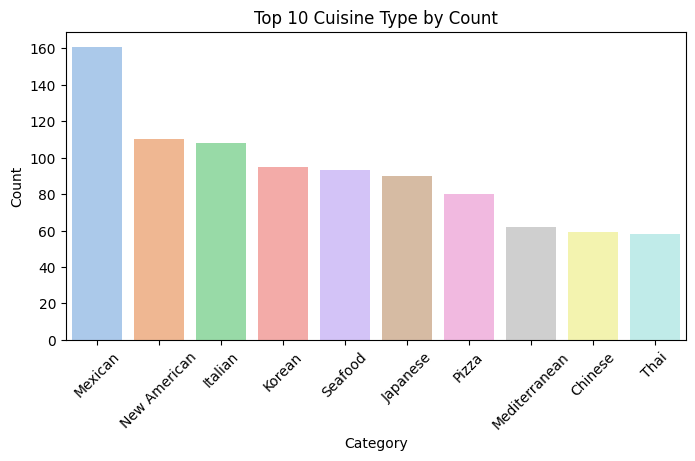

In [ ]:
#We will use only Categories 0 title as ou main cuisine type as it has no missing values and correctly represent the true cuisine type of the restaurant
#Find the most popular cuisine type in the dataset (Top 10)
food_category = Yelp['Categories_0_title'].value_counts()
top_10 = food_category.head(10)
print(top_10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10.index,y=top_10.values,palette='pastel')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Cuisine Type by Count')
plt.xticks(rotation=45)
plt.show()

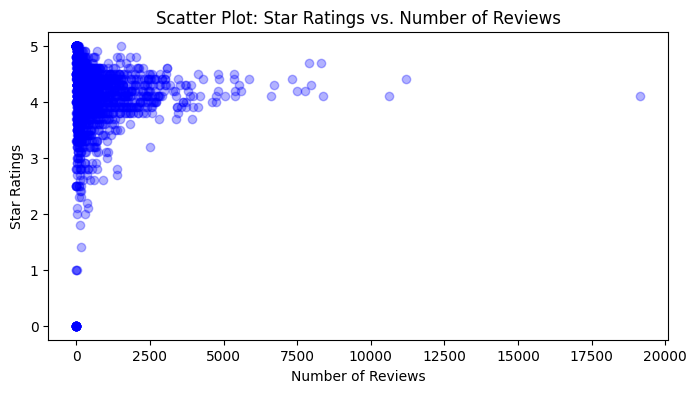

In [ ]:
#Scatter plot to see the correlation between number of reviews and star ratings
plt.figure(figsize=(8, 4))
plt.scatter(Yelp['ReviewCount'], Yelp['Rating'], alpha=0.3, color='blue')
plt.xlabel('Number of Reviews')
plt.ylabel('Star Ratings')
plt.title('Scatter Plot: Star Ratings vs. Number of Reviews')
plt.show()

In [ ]:
# Calculate the correlation between 'ReviewCount' and 'Rating_numeric'
correlation = Yelp['ReviewCount'].corr(Yelp['Rating'])
print(f"Correlation between ReviewCount and Rating: {correlation}")

Correlation between ReviewCount and Rating: 0.003222962567526092


<ipython-input-16-94948fc9b8e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categories_0_title', y='Rating', data=filtered_data, palette="Set3",order=top_categories)


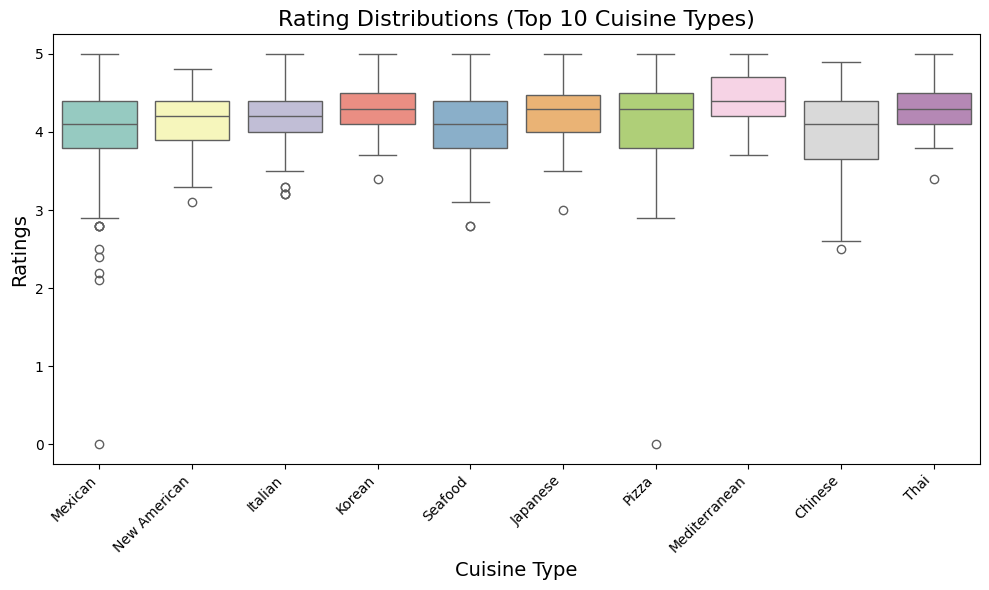

In [ ]:
# boxplot to show rating distribution by cuisine types
top_categories = Yelp['Categories_0_title'].value_counts().head(10).index
filtered_data = Yelp[Yelp['Categories_0_title'].isin(top_categories)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Categories_0_title', y='Rating', data=filtered_data, palette="Set3",order=top_categories)

plt.xticks(rotation=45, ha='right')
plt.title('Rating Distributions (Top 10 Cuisine Types)', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Ratings', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
#Correlation between restaurant ranking and star ratings
correlation = Yelp['Ranking'].corr(Yelp['Rating'])
print("Correlation between Review Count and Rating:", correlation)

Correlation between Review Count and Rating: -0.12806450476948608


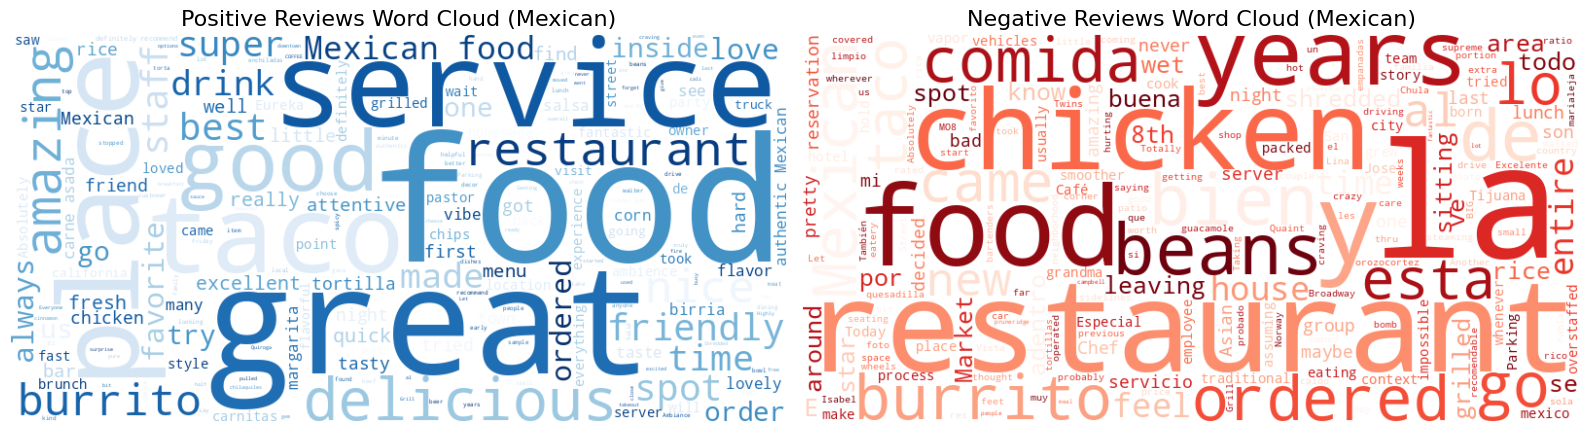

In [ ]:
#Most prevalent positive and negative words from the cuisine type
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data for a specific cuisine type
cuisine_type = "Mexican"
filtered_data = Yelp[Yelp['Categories_0_title'] == cuisine_type].copy()

# Function to determine sentiment polarity
def get_sentiment(text):
    try:
        analysis = TextBlob(str(text))  # Ensure text is converted to a string
        return "Positive" if analysis.sentiment.polarity > 0 else "Negative"
    except:
        return "Neutral"

# Drop NaN values in 'Snippet' and apply sentiment analysis
filtered_data = filtered_data.dropna(subset=['Snippet'])
filtered_data['Sentiment'] = filtered_data['Snippet'].apply(get_sentiment)

# Combine positive and negative review snippets
positive_reviews = " ".join(filtered_data[filtered_data['Sentiment'] == "Positive"]['Snippet'])
negative_reviews = " ".join(filtered_data[filtered_data['Sentiment'] == "Negative"]['Snippet'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title(f"Positive Reviews Word Cloud ({cuisine_type})", fontsize=16)
plt.axis('off')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title(f"Negative Reviews Word Cloud ({cuisine_type})", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


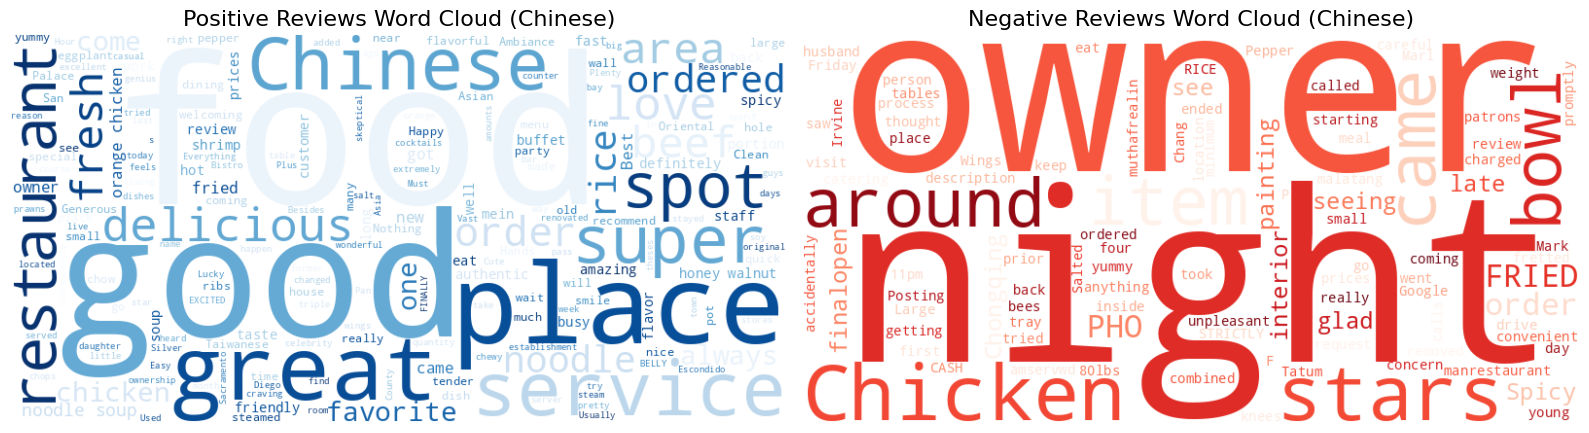

In [ ]:
#Most prevalent positive and negative words from the cuisine type
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data for a specific cuisine type
cuisine_type = "Chinese"
filtered_data = Yelp[Yelp['Categories_0_title'] == cuisine_type].copy()

# Function to determine sentiment polarity
def get_sentiment(text):
    try:
        analysis = TextBlob(str(text))  # Ensure text is converted to a string
        return "Positive" if analysis.sentiment.polarity > 0 else "Negative"
    except:
        return "Neutral"

# Drop NaN values in 'Snippet' and apply sentiment analysis
filtered_data = filtered_data.dropna(subset=['Snippet'])
filtered_data['Sentiment'] = filtered_data['Snippet'].apply(get_sentiment)

# Combine positive and negative review snippets
positive_reviews = " ".join(filtered_data[filtered_data['Sentiment'] == "Positive"]['Snippet'])
negative_reviews = " ".join(filtered_data[filtered_data['Sentiment'] == "Negative"]['Snippet'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title(f"Positive Reviews Word Cloud ({cuisine_type})", fontsize=16)
plt.axis('off')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title(f"Negative Reviews Word Cloud ({cuisine_type})", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


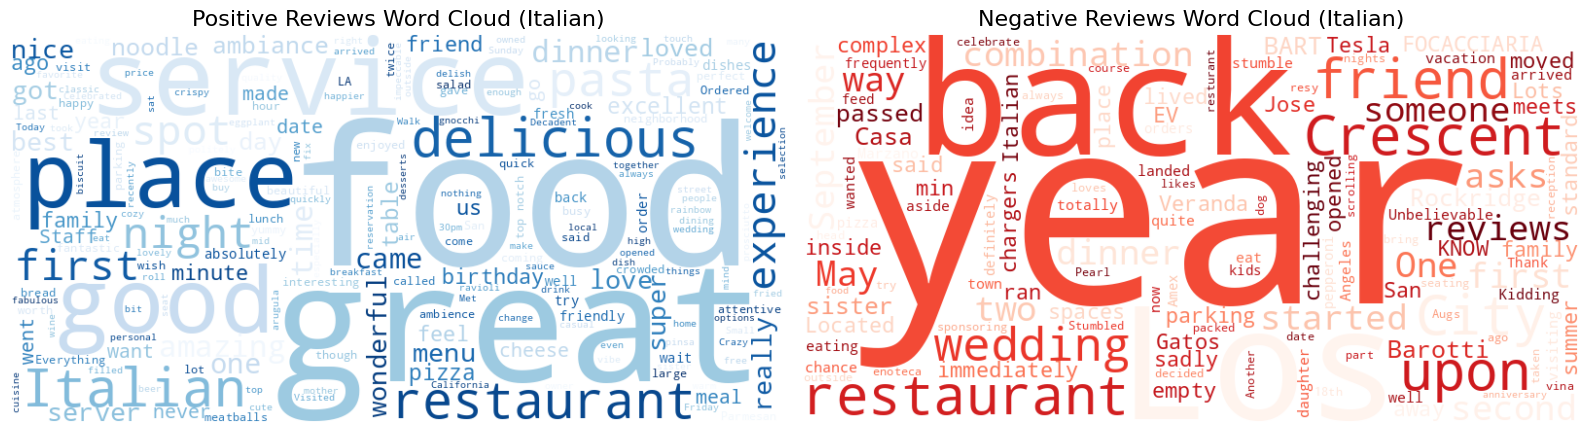

In [ ]:
#Most prevalent positive and negative words from the cuisine type
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data for a specific cuisine type
cuisine_type = "Italian"
filtered_data = Yelp[Yelp['Categories_0_title'] == cuisine_type].copy()

# Function to determine sentiment polarity
def get_sentiment(text):
    try:
        analysis = TextBlob(str(text))  # Ensure text is converted to a string
        return "Positive" if analysis.sentiment.polarity > 0 else "Negative"
    except:
        return "Neutral"

# Drop NaN values in 'Snippet' and apply sentiment analysis
filtered_data = filtered_data.dropna(subset=['Snippet'])
filtered_data['Sentiment'] = filtered_data['Snippet'].apply(get_sentiment)

# Combine positive and negative review snippets
positive_reviews = " ".join(filtered_data[filtered_data['Sentiment'] == "Positive"]['Snippet'])
negative_reviews = " ".join(filtered_data[filtered_data['Sentiment'] == "Negative"]['Snippet'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title(f"Positive Reviews Word Cloud ({cuisine_type})", fontsize=16)
plt.axis('off')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title(f"Negative Reviews Word Cloud ({cuisine_type})", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


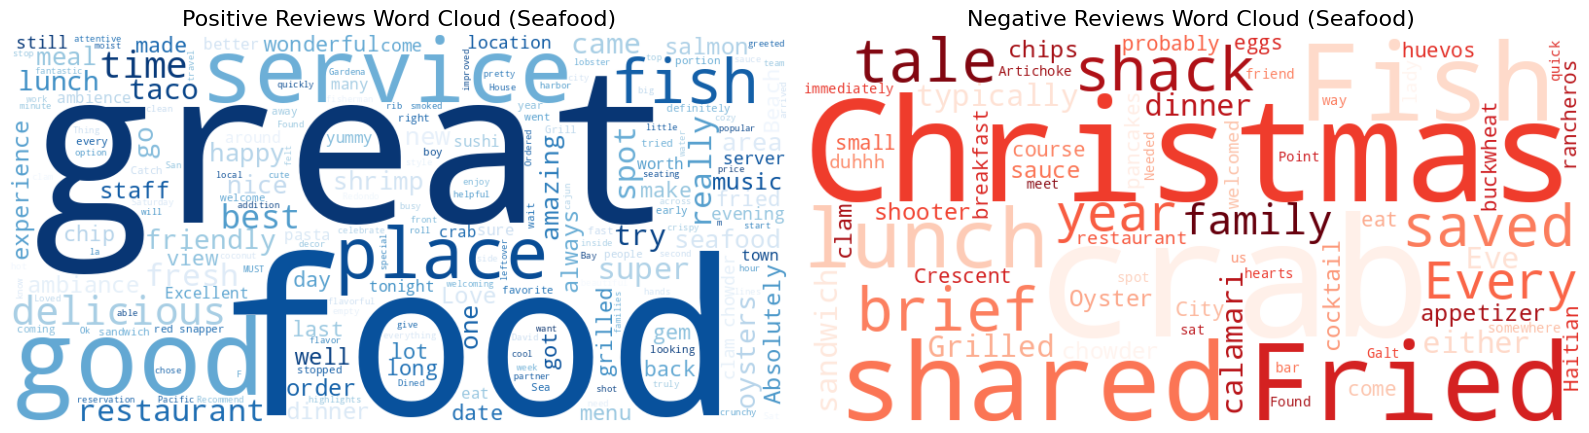

In [ ]:
#Most prevalent positive and negative words from the cuisine type
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data for a specific cuisine type
cuisine_type = "Seafood"
filtered_data = Yelp[Yelp['Categories_0_title'] == cuisine_type].copy()

# Function to determine sentiment polarity
def get_sentiment(text):
    try:
        analysis = TextBlob(str(text))  # Ensure text is converted to a string
        return "Positive" if analysis.sentiment.polarity > 0 else "Negative"
    except:
        return "Neutral"

# Drop NaN values in 'Snippet' and apply sentiment analysis
filtered_data = filtered_data.dropna(subset=['Snippet'])
filtered_data['Sentiment'] = filtered_data['Snippet'].apply(get_sentiment)

# Combine positive and negative review snippets
positive_reviews = " ".join(filtered_data[filtered_data['Sentiment'] == "Positive"]['Snippet'])
negative_reviews = " ".join(filtered_data[filtered_data['Sentiment'] == "Negative"]['Snippet'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title(f"Positive Reviews Word Cloud ({cuisine_type})", fontsize=16)
plt.axis('off')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title(f"Negative Reviews Word Cloud ({cuisine_type})", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Plot map to see if the location of the restaurant is correlated with the ratings
!pip install pandas geopandas folium matplotlib
import folium
from folium.plugins import MarkerCluster

filtered_data = Yelp[['Rating', 'Latitude', 'Longitude']].dropna()

average_lat = filtered_data['Latitude'].mean()
average_lon = filtered_data['Longitude'].mean()
rating_map = folium.Map(location=[average_lat, average_lon], zoom_start=10)

marker_cluster = MarkerCluster().add_to(rating_map)

for index, row in filtered_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        fill_color='green' if row['Rating'] >= 4 else 'red',
        popup=f"Rating: {row['Rating']}"
    ).add_to(marker_cluster)

rating_map.save("ratings_map.html")
rating_map



In [ ]:
#Pre-processing the data for machine learning models
from sklearn.preprocessing import LabelEncoder

# Select relevant features and target
features = Yelp[['Categories_0_title', 'Longitude', 'Latitude', 'ReviewCount']]
target = Yelp['Rating']

# Encode the 'Cuisine_Type' column
label_encoder = LabelEncoder()
features['Categories_0_title'] = label_encoder.fit_transform(features['Categories_0_title'])

#Bin ratings into categories (e.g., Low, Medium, High)
# 0 - 2 = low, 2 - 3.5 = medium, 3.5 - 5 = high
target = pd.cut(target, bins=[0, 2.5, 4, 5], labels=['Low', 'Medium', 'High'])

<ipython-input-4-7a01fc5dcdcb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Categories_0_title'] = label_encoder.fit_transform(features['Categories_0_title'])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
#handle missing values
X_train = X_train.dropna()
y_train = y_train.dropna()
y_train = y_train.replace('nan', None).dropna()
y_test = y_test.replace('nan', None).dropna()

valid_indices_train = X_train.index.intersection(y_train.index)
X_train = X_train.loc[valid_indices_train]
y_train = y_train.loc[valid_indices_train]

# Filter y_test to remove invalid entries before predictions
valid_test_indices = y_test.replace('nan', None).dropna().index
y_test_filtered = y_test.loc[valid_test_indices]

In [ ]:
#Decision Tree models
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Re-run predictions for the filtered test set
X_test_filtered = X_test.loc[valid_test_indices]
y_pred_dt_filtered = dt_model.predict(X_test_filtered)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
y_test = y_test.astype(str)
y_pred_dt = y_pred_dt.astype(str)
print("Decision Tree Accuracy:", accuracy_score(y_test_filtered, y_pred_dt_filtered))
print(classification_report(y_test_filtered, y_pred_dt_filtered))


Decision Tree Accuracy: 0.6170542635658914
              precision    recall  f1-score   support

        High       0.76      0.69      0.72       456
         Low       0.00      0.00      0.00         6
      Medium       0.38      0.45      0.41       183

    accuracy                           0.62       645
   macro avg       0.38      0.38      0.38       645
weighted avg       0.64      0.62      0.63       645



In [ ]:
#Decision Tree model with pruning parameters
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)

# Train the model
dt_model.fit(X_train, y_train)

# Re-run predictions for the filtered test set
X_test_filtered = X_test.loc[valid_test_indices]
y_pred_dt_filtered = dt_model.predict(X_test_filtered)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
y_test = y_test.astype(str)
y_pred_dt = y_pred_dt.astype(str)

# Evaluation metrics
print("Decision Tree Accuracy:", accuracy_score(y_test_filtered, y_pred_dt_filtered))
print(classification_report(y_test_filtered, y_pred_dt_filtered))


Decision Tree Accuracy: 0.703875968992248
              precision    recall  f1-score   support

        High       0.77      0.85      0.80       456
         Low       0.00      0.00      0.00         6
      Medium       0.48      0.37      0.42       183

    accuracy                           0.70       645
   macro avg       0.42      0.41      0.41       645
weighted avg       0.68      0.70      0.69       645



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.impute import SimpleImputer

# Apply SimpleImputer to fill missing values in the features with the mean (or median for better robustness)
imputer = SimpleImputer(strategy='mean')

# Impute missing values for numerical columns in the features
features_imputed = imputer.fit_transform(features)

# Check for missing values after imputation
print(pd.DataFrame(features_imputed).isnull().sum())  # This should show no NaN values now

# Drop rows with missing target values
target = target.dropna()  # Remove rows with NaN in target

# Make sure X aligns with the cleaned y
features_imputed = features_imputed[target.index]  # Ensure X and y are still aligned after dropping

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Check if there are any NaN values in the training and testing sets
print(f"X_train NaNs: {pd.DataFrame(X_train).isnull().sum().sum()}")
print(f"y_train NaNs: {y_train.isnull().sum()}")
print(f"X_test NaNs: {pd.DataFrame(X_test).isnull().sum().sum()}")
print(f"y_test NaNs: {y_test.isnull().sum()}")


0    0
1    0
2    0
3    0
dtype: int64
X_train NaNs: 0
y_train NaNs: 0
X_test NaNs: 0
y_test NaNs: 0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Convert predictions and true labels to strings to handle any potential mismatches
y_test = y_test.astype(str)
y_pred_rf = y_pred_rf.astype(str)

# Accuracy and classification report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Verify the shapes of X_test and y_test
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


Random Forest Accuracy: 0.7199074074074074
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       284
           1       0.00      0.00      0.00         4
           2       0.64      0.42      0.51       144

    accuracy                           0.72       432
   macro avg       0.46      0.43      0.44       432
weighted avg       0.70      0.72      0.70       432

X_test shape: (432, 4)
y_test shape: (432,)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the data (PCA works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on PCA-transformed data
rf_model.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test set
y_pred_rf = rf_model.predict(X_test_pca)

# Convert predictions and true labels to strings to handle any potential mismatches
y_test = y_test.astype(str)
y_pred_rf = y_pred_rf.astype(str)

# Accuracy and classification report
print("Random Forest Accuracy(PCA):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Check how much variance is explained by the retained components
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by PCA components:", explained_variance)
print(f"Number of PCA components retained: {pca.n_components_}")


Random Forest Accuracy(PCA): 0.6574074074074074
              precision    recall  f1-score   support

        High       0.70      0.85      0.77       284
         Low       0.00      0.00      0.00         4
      Medium       0.49      0.29      0.37       144

    accuracy                           0.66       432
   macro avg       0.40      0.38      0.38       432
weighted avg       0.62      0.66      0.63       432

Explained Variance by PCA components: [0.49675527 0.25393994 0.24389005]
Number of PCA components retained: 3


In [ ]:
#Try to apply SMOTE to the random forest model
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

rf_remodel = RandomForestClassifier(n_estimators=100, random_state=42)
rf_remodel.fit(X_train_balanced, y_train_balanced)

# 5. Predict on the test set
y_pred_rf_remodel = rf_remodel.predict(X_test)

# 6. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf_remodel))
print(classification_report(y_test, y_pred_rf_remodel))


Accuracy: 0.6620370370370371
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       284
           1       0.00      0.00      0.00         4
           2       0.53      0.53      0.53       144

    accuracy                           0.66       432
   macro avg       0.44      0.42      0.43       432
weighted avg       0.69      0.66      0.67       432



In [ ]:
#Cross Validation for Random Forest
from sklearn.model_selection import StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.7041557128412539


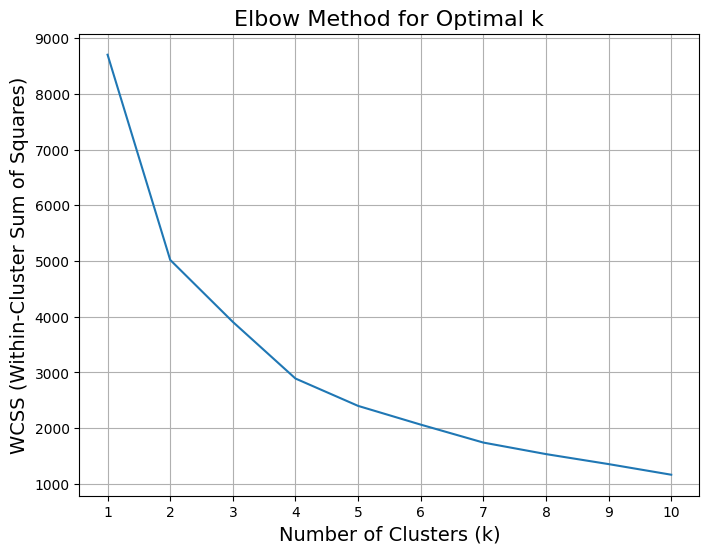

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Assuming 'features' is your dataset
# If necessary, you can apply scaling (StandardScaler, MinMaxScaler) for better results
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
wcss = []
for k in range(1, 11):  # Check for k values from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=4)  # You can experiment with different values of k

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Convert predictions and true labels to strings if necessary
y_test = y_test.astype(str)
y_pred_knn = y_pred_knn.astype(str)

# Evaluate the KNN model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Verify the shapes of X_test and y_test
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


KNN Accuracy: 0.6689814814814815
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       284
           1       0.00      0.00      0.00         4
           2       0.52      0.23      0.32       144

    accuracy                           0.67       432
   macro avg       0.41      0.38      0.37       432
weighted avg       0.63      0.67      0.62       432

X_test shape: (432, 4)
y_test shape: (432,)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#KNN afer hyperparameter tune
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=4, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with the best parameters
best_knn_model = grid_search.best_estimator_
y_pred_knn_best = best_knn_model.predict(X_test)

# Convert predictions and true labels to strings if necessary
y_test = y_test.astype(str)
y_pred_knn_best = y_pred_knn_best.astype(str)

# Accuracy and classification report for the best model
print("Best KNN Accuracy:", accuracy_score(y_test, y_pred_knn_best))
print(classification_report(y_test, y_pred_knn_best))


Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best KNN Accuracy: 0.6597222222222222
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       284
           1       0.00      0.00      0.00         4
           2       0.49      0.26      0.34       144

    accuracy                           0.66       432
   macro avg       0.40      0.38      0.37       432
weighted avg       0.62      0.66      0.62       432



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               Rating  ReviewCount  Longitude  Latitude   Ranking
Rating       1.000000     0.003223   0.018082 -0.071159 -0.128065
ReviewCount  0.003223     1.000000   0.044630 -0.075662 -0.115116
Longitude    0.018082     0.044630   1.000000 -0.976865 -0.025678
Latitude    -0.071159    -0.075662  -0.976865  1.000000  0.002244
Ranking     -0.128065    -0.115116  -0.025678  0.002244  1.000000


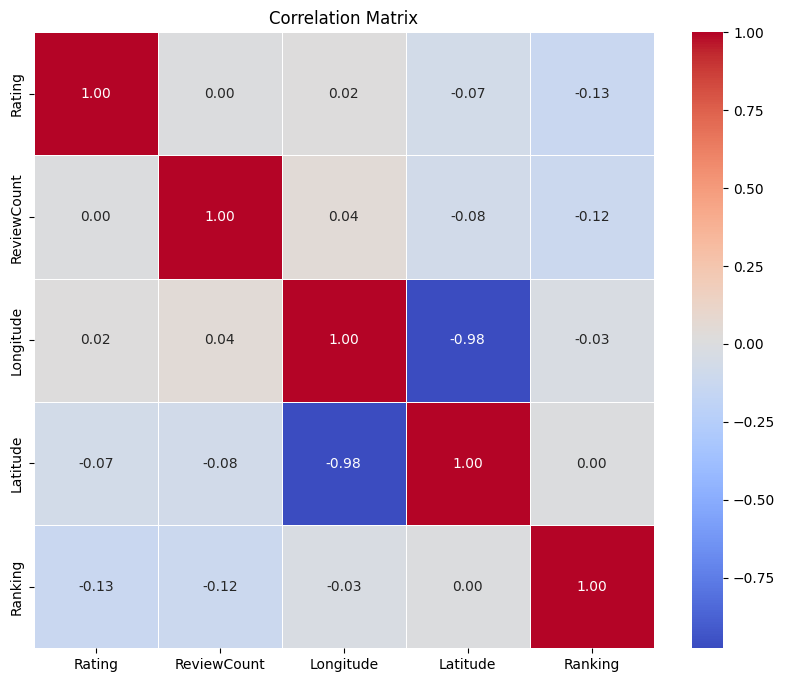

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First, make sure to include only numeric columns for correlation
# You can exclude non-numeric columns such as categorical columns.
df_numeric = Yelp.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

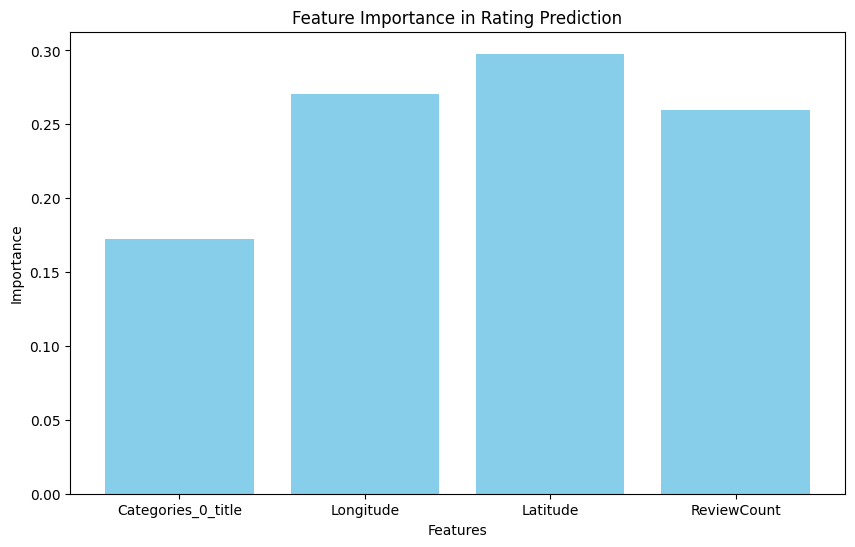

In [ ]:
#Feature of importance from random forest
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(features.columns, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Rating Prediction')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# 1. Prepare features and target
features = Yelp[['Categories_0_title', 'Longitude', 'Latitude', 'ReviewCount']].copy()
label_encoder = LabelEncoder()
features['Categories_0_title'] = label_encoder.fit_transform(features['Categories_0_title'].astype(str))

# Bin the ratings into categories and remove NaN values
target = Yelp['Rating'].dropna()
target = pd.cut(target, bins=[0, 2, 3.5, 5], labels=['Low', 'Medium', 'High'])
target = target.astype(str)  # Ensure the target is a string type for classification

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Ensure no NaN values
X_train = features.dropna()
y_train = target[X_train.index]

# 3. Apply SMOTE to balance classes
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# 5. Predict on the test set
y_pred = dt_model.predict(X_test)

# 6. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       401
      Medium       1.00      1.00      1.00        30
         nan       1.00      1.00      1.00         5

    accuracy                           1.00       436
   macro avg       1.00      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# Train and evaluate Decision Tree model
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Stratified Accuracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt))

# Train and evaluate Random Forest model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Stratified Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))


Decision Tree Stratified Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       401
      Medium       1.00      1.00      1.00        30
         nan       1.00      1.00      1.00         5

    accuracy                           1.00       436
   macro avg       1.00      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436

Random Forest Stratified Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       401
      Medium       1.00      1.00      1.00        30
         nan       1.00      1.00      1.00         5

    accuracy                           1.00       436
   macro avg       1.00      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436

